## Building a CNN to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

For details about CIFAR-10 see:
https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

---

### Building Convolutional Neural Nets

In this exercise we will build and train our first convolutional neural networks.  In the first part, we walk through the different layers and how they are configured.  In the second part, you will build your own model, train it, and compare the performance.

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 5s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape

(32, 32, 3)

[9]


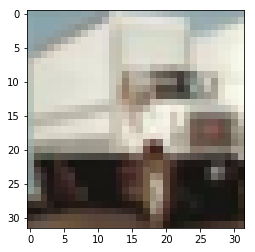

In [0]:
## Let's look at one of the images

print(y_train[444])
plt.imshow(x_train[444]);

In [0]:
num_classes = 10
print(y_test)
y_test_lab=np.copy(y_test)
print(y_test_lab)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [0]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.

---

## First CNN
Below we will build our first CNN.  For demonstration purposes (so that it will train quickly) it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output.  After a MaxPooling layer, we flatten, and then have a single fully connected layer before our final classification layer.

In [0]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

W0904 16:25:02.309591 140578443532160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 16:25:02.370482 140578443532160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 16:25:02.378952 140578443532160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 16:25:02.442909 140578443532160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0904 16:25:02.446482 140578443532160 deprecation_wrapp

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_2 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

**Question:** why the second Conv layer's output is 6x6? Stride of 2 should define the ratio between the input and output size, thus one could expect to have 8x8. What's happen here?


**Answer:** it is due to the filter size.
![16x16_with_5x5xpath_2stride](http://ml.unife.it/wp-content/uploads/2019/09/16x16_with_5x5xpath_2stride.png)
As one can see in the image, the last pixels aer discarded as the filter goes out the image. The first layer of the net uses padding to avoid this problem (the output of the first conv layer is 16x16).

We still have 181K parameters, even though this is a "small" model.



In [0]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

run_hist_1=model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

W0904 16:25:02.554765 140578443532160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 16:25:02.564116 140578443532160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.

W0904 16:25:02.799475 140578443532160 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 33s 653us/step - loss: 1.7258 - acc: 0.3713 - val_loss: 1.4336 - val_acc: 0.4876
Epoch 2/15
50000/50000 [==============================] - 32s 645us/step - loss: 1.4383 - acc: 0.4851 - val_loss: 1.3219 - val_acc: 0.5381
Epoch 3/15
50000/50000 [==============================] - 33s 650us/step - loss: 1.3457 - acc: 0.5217 - val_loss: 1.2200 - val_acc: 0.5725
Epoch 4/15
50000/50000 [==============================] - 32s 636us/step - loss: 1.2745 - acc: 0.5483 - val_loss: 1.2787 - val_acc: 0.5464
Epoch 5/15
50000/50000 [==============================] - 32s 635us/step - loss: 1.2286 - acc: 0.5673 - val_loss: 1.1255 - val_acc: 0.6021
Epoch 6/15
50000/50000 [==============================] - 31s 628us/step - loss: 1.1950 - acc: 0.5801 - val_loss: 1.1760 - val_acc: 0.5850
Epoch 7/15
50000/50000 [==============================] - 31s 622us/step - loss: 1.1651 - acc: 0.5904 - val_loss: 1.

In [0]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
y_pred_class = model_1.predict_classes(x_test)
y_pred_prob = model_1.predict_proba(x_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test_lab,y_pred_class)))

accuracy is 0.620


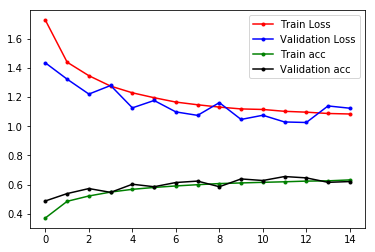

In [0]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.plot(run_hist_1.history["acc"],'g', marker='.', label="Train acc")
ax.plot(run_hist_1.history["val_acc"],'k', marker='.', label="Validation acc")
ax.legend()


### Exercise
Our previous model had the structure:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

1. Build a more complicated model with the following pattern:
- Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

2. How many parameters does your model have?  How does that compare to the previous model?

3. Train it for 5 epochs.  What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

5. Try different structures and run times, and see how accurate your model can be.


In [0]:
# Let's build a CNN using Keras' Sequential capabilities

model_2 = Sequential()

## 5x5 convolution without stride and 32 filters
model_2.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5), padding='same', strides = (2,2)))
model_2.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5),padding='same'))
model_2.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_66 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
activation_67 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 8, 8, 32)        

In [0]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

run_hist_2=model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)


In [0]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
y_pred_class = model_2.predict_classes(x_test)
y_pred_prob = model_2.predict_proba(x_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test_lab,y_pred_class)))

In [0]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.plot(run_hist_2.history["acc"],'g', marker='.', label="Train acc")
ax.plot(run_hist_2.history["val_acc"],'k', marker='.', label="Validation acc")
ax.legend()